In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import time
import functools

In [16]:
# Membuat function untuk mengubah tensor menjadi image
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype = np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

  # Membuat function untuk mengubah image menjadi tensor
def image_to_tensor(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels = 3, dtype = tf.float32)

  img = tf.image.resize(img, [512,512])
  img = img[tf.newaxis, :]
  return img

In [9]:
# Membuat objek masing-masing gambar berupa tensor
tensor_cat = image_to_tensor('/content/cat.jpg')
tensor_style = image_to_tensor('/content/img.jpg')

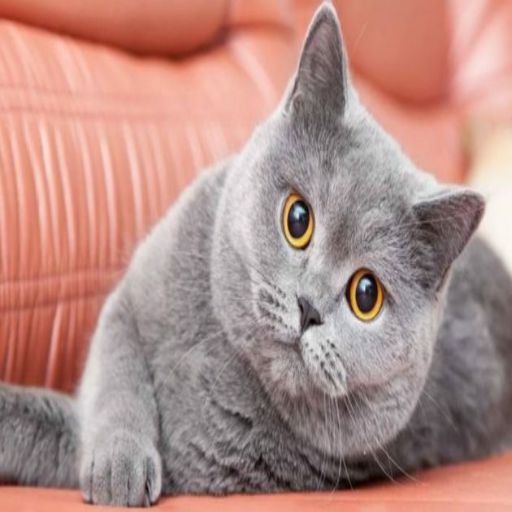

In [18]:
# Menampilkan Gambar Kucing
tensor_to_image(tensor_cat)

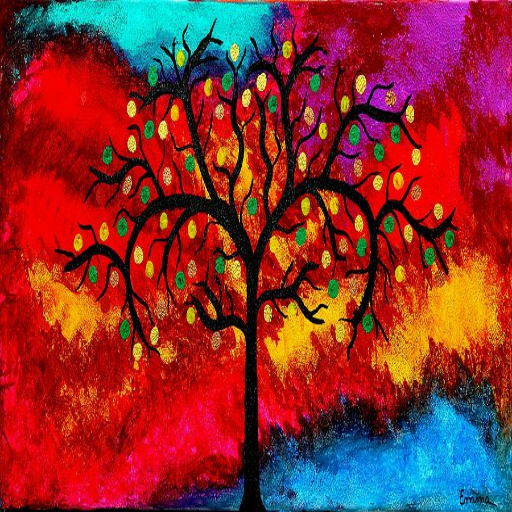

In [19]:
# Menampilkan lukisan yang akan ditransfer
tensor_to_image(tensor_style)

In [12]:
# Memproses mentransfer style ke gambar kucing
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

stylized_image = hub_module(
    tf.constant(tensor_cat), 
    tf.constant(tensor_style)
)[0]

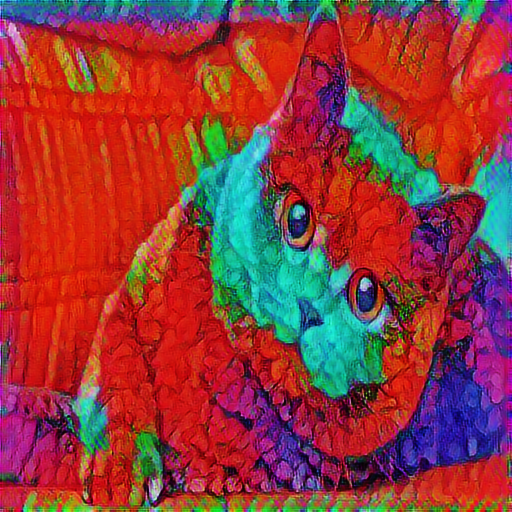

In [17]:
# Menampilkan hasil dari style transfer
tensor_to_image(stylized_image)